#📌 Extracción de datos


In [2]:
import pandas as pd
import requests


In [4]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'
response = requests.get(url)
df = response.json()

In [57]:
datos = pd.json_normalize(df)
datos

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#🔧 Transformación

##Conoce el conjunto de datos

In [52]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            0 non-null      object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   int64  
 5   customer.Dependents        7267 non-null   int64  
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   int64  
 8   phone.MultipleLines        6560 non-null   object 
 9   internet.InternetService   1581 non-null   object 
 10  internet.OnlineSecurity    5686 non-null   object 
 11  internet.OnlineBackup      5686 non-null   object 
 12  internet.DeviceProtection  5686 non-null   object 
 13  internet.TechSupport       5686 non-null   objec

In [59]:
datos.dtypes

,0
customerID,object
Churn,category
customer.gender,category
customer.SeniorCitizen,int64
customer.Partner,category
customer.Dependents,category
customer.tenure,int64
phone.PhoneService,category
phone.MultipleLines,category
internet.InternetService,category


In [35]:
datos_columnas = datos.columns
datos_columnas

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

##Comprobando incoherencias en los datos

In [36]:
datos.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [38]:
datos.duplicated().sum()

np.int64(0)

In [30]:
uniques = datos.apply(lambda x: x.unique())
uniques

,0
customerID,"[0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0011-IGKF..."
Churn,"[No, Yes, ]"
customer_gender,"[Female, Male]"
customer_SeniorCitizen,"[0, 1]"
customer_Partner,"[Yes, No]"
customer_Dependents,"[Yes, No]"
customer_tenure,"[9, 4, 13, 3, 71, 63, 7, 65, 54, 72, 5, 56, 34..."
phone_PhoneService,"[Yes, No]"
phone_MultipleLines,"[No, Yes, No phone service]"
internet_InternetService,"[DSL, Fiber optic, No]"


In [64]:
(datos[datos_columnas] == "").sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [65]:
(datos[datos_columnas] == " ").sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


##Manejo de inconsistencias

In [53]:
datos_columnas_categoricas = ["Churn", "customer.Partner", "customer.Dependents",
                              "phone.PhoneService", "account.PaperlessBilling","customer.gender", "phone.MultipleLines", "internet.InternetService",
                 "internet.OnlineSecurity", "internet.OnlineBackup",
                 "internet.DeviceProtection", "internet.TechSupport",
                 "internet.StreamingTV", "internet.StreamingMovies",
                 "account.Contract", "account.PaymentMethod"]
datos_columnas_flotantes = ["account.Charges.Total"]

In [67]:
datos[datos_columnas_categoricas] = datos[datos_columnas_categoricas].astype("category")
datos["account.Charges.Total"] = datos["account.Charges.Total"].replace(" ", "0").astype("float64")

In [70]:
datos["Churn"] = datos["Churn"].replace("", "NaN")

In [68]:
datos.dtypes

,0
customerID,object
Churn,category
customer.gender,category
customer.SeniorCitizen,int64
customer.Partner,category
customer.Dependents,category
customer.tenure,int64
phone.PhoneService,category
phone.MultipleLines,category
internet.InternetService,category


##Columna de cuentas diarias

In [72]:
datos["Cuentas.diarias"] = datos["account.Charges.Total"] /30
datos

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas.diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,19.776667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,18.080000
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,9.361667
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,41.261667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,8.913333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,24.763333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,62.456667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,3.091667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,154.255000


#📊 Carga y análisis(L - Load & Analysis)

##Analisis Descriptivo

In [73]:
datos.describe(include="all")

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas.diarias
count,7267,7267,7267,7267.000000,7267,7267,7267.000000,7267,7267,7267,...,7267,7267,7267,7267,7267,7267,7267,7267.000000,7267.000000,7267.000000
unique,7267,2,2,NaN,2,2,NaN,2,3,3,...,3,3,3,3,3,2,4,NaN,NaN,NaN
top,9995-HOTOH,No,Male,NaN,No,No,NaN,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,NaN
freq,1,5398,3675,NaN,3749,5086,NaN,6560,3495,3198,...,3195,3582,2896,2870,4005,4311,2445,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.162653,NaN,NaN,32.346498,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.720098,2277.182035,75.906068
std,NaN,NaN,NaN,0.369074,NaN,NaN,24.571773,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.129572,2268.648587,75.621620
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,0.000000,0.000000
25%,NaN,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.425000,396.200000,13.206667
50%,NaN,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.300000,1389.200000,46.306667
75%,NaN,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.875000,3778.525000,125.950833


##Distribución de evacion

In [82]:
import matplotlib.pyplot as plt

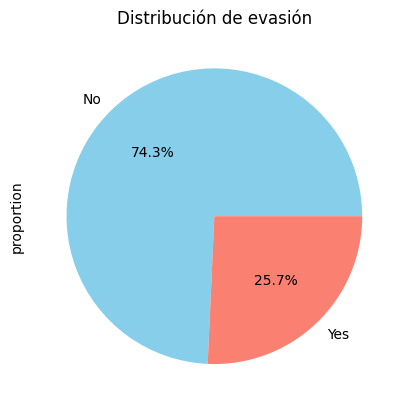

In [83]:
datos["Churn"].value_counts(normalize=True).plot(
    kind="pie", autopct="%1.1f%%", colors=["skyblue", "salmon"]
)
plt.title("Distribución de evasión")
plt.show()

##Recuento de evasión por variables categóricas

In [86]:
pd.crosstab(datos["customer.gender"], datos["Churn"], normalize="index")

Churn,No,Yes
customer.gender,,
Female,0.738586,0.261414
Male,0.746939,0.253061


In [88]:
pd.crosstab(datos["account.Contract"], datos["Churn"], normalize="index")

Churn,No,Yes
account.Contract,,
Month-to-month,0.586767,0.413233
One year,0.890718,0.109282
Two year,0.972461,0.027539


In [89]:
pd.crosstab(datos["account.PaymentMethod"], datos["Churn"], normalize="index")

Churn,No,Yes
account.PaymentMethod,,
Bank transfer (automatic),0.837634,0.162366
Credit card (automatic),0.852041,0.147959
Electronic check,0.561963,0.438037
Mailed check,0.815015,0.184985


In [92]:
pd.crosstab(datos["customer.Partner"], datos["Churn"], normalize="index")

Churn,No,Yes
customer.Partner,,
No,0.679915,0.320085
Yes,0.809835,0.190165


In [94]:
datos.groupby("Churn")[["account.Charges.Total", "customer.tenure"]].describe()

/tmp/ipython-input-2725544485.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  datos.groupby("Churn")[["account.Charges.Total", "customer.tenure"]].describe()


account.Charges.Total                                             \
                      count         mean          std    min       25%   
Churn                                                                    
No                   5398.0  2535.263977  2330.802193   0.00  564.3625   
Yes                  1869.0  1531.796094  1890.822994  18.85  134.5000   

                                   customer.tenure                             \
            50%       75%      max           count       mean        std  min   
Churn                                                                           
No     1663.625  4237.275  8672.45          5398.0  37.321045  24.178367  0.0   
Yes     703.550  2331.300  8684.80          1869.0  17.979133  19.531123  1.0   

                               
        25%   50%   75%   max  
Churn                          
No     14.0  37.0  61.0  72.0  
Yes     2.0  10.0  29.0  72.0

In [95]:
datos.groupby("Churn")[["customer.tenure", "customer.tenure"]].describe()

/tmp/ipython-input-2648736570.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  datos.groupby("Churn")[["customer.tenure", "customer.tenure"]].describe()


customer.tenure                                                     \
                count       mean        std  min   25%   50%   75%   max   
Churn                                                                      
No             5398.0  37.321045  24.178367  0.0  14.0  37.0  61.0  72.0   
Yes            1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0   

                                                                  
        count       mean        std  min   25%   50%   75%   max  
Churn                                                             
No     5398.0  37.321045  24.178367  0.0  14.0  37.0  61.0  72.0  
Yes    1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0

##Informe Final

###Introducción

Este analisis se llevo acabo con el motivo de comprender los factores que llevan a la perdida de clientes en Telecom X, mediante el uso del lenguaje de programación python con el cual realizaremos un Analisis Exploratorio de Datos

###Limpieza y tratamiento de datos

####Importación de los datos

Inicialmente exportamos los datos mediante una API, tomamos su url y la asignamos a una variable, hacemos una petición HTTP y convertimos la respuesta que nos brinda la API a un objeto de python. Eventualmente mediante el uso de pandas convertimos ese objeto de un dataframe

####Limpiar y procesar los datos

Verificamos si existen valores ausentes, valores duplicados, errores de formato, conversión de tipo de datos, campos con espacios vacios etc. Una vez identificado y corregido podemos seguir con la tarea asignada en un inicio.

###Analisis exploratorio de datos

Inicialmente hicimos un resumen estadistico de todas las columnas mediante "describe()", luego vimos que porcentaje de clientes habian evadido con la ayuda de un grafico de pastel, tambien realizamos una comparativa para ver si las variables categoricas como el genero, el metodo de pago, entre otros nos mostraban alguna tendencia a tener en consideración.

###Conclusiones e Insights

Mediante el grafico de pastel nos dimos cuenta que aproximadamente un 25.7% de los clientes evadieron de manera general, sin tener ninguna variable categorica en cuenta. Al momento de añadir las variables categoricas en algunas de ellas paso lo mismo, como por ejemplo al tener en cuenta el genero la discrepancia con los valores anteriores es insignificante, cuando tuvimos en cuenta el metodo de pago si vimos un gran cambio con las personas que pagaban mes a mes, ya que un 41% evadio, y mientras el contrato era por mas tiempo este porcentaje bajaba, por ejemplo las personas con un año de contrato solo evadieron en un 10.9% y las que tenian contrato de dos años en un 2.7%. Las personas que pagaban mediante tranferencia evadian en un 16.2%, las personas que lo hacian mediante tarjeta de credito en un 14.7%, las que lo hacian mediante cheque electronico o por correo lo hacian en un 43.8% y 18.4 respectivamente.

###Recomendaciones

Prorizar alguna estrategia para retener a los clientes de contratos cortos.
Ofrecer metodos de pago mas seguro en base al analisis, digase tarjeta de credito.
Dar mayor promoción a los contratos a largo plazo.